In [7]:
#RANDOM SQUARE ART

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
def determine_block_color():
    
    selected_color = np.random.choice(colors)                #select color
    return(selected_color)

In [9]:
def select_element():                                        #selected (by index) element is NW of square
    
    temp_grid = np.copy(grid)                                #create temporary 1D grid (copy of grid)
    k = 0
    
    for i in range(grid.size):                               #loop thru termporary 1D grid elements and set zeros to positive integers 'k'
        if temp_grid[i] == 0:
            k = k + 1
            temp_grid[i] = k
    
    selection = np.random.randint(1, k + 1)                  
    return(np.where(temp_grid == selection)[0])              #return 1D grid index of random positive integer selection

In [10]:
def determine_block_size():
    
    availablex_space = number_cols - (selected_index % number_cols)           #determine physical space available
    availabley_space = number_rows - (selected_index // number_cols)           
    approved_space = min(availablex_space, availabley_space);                            

    n = 0
    flag = True
    selected_row_index = selected_index // number_cols; 
    selected_col_index = selected_index % number_cols; 
    
    while flag:
        n = n + 1
        test_array = (                                                       #create nxn subarray of 1d grid   
                  grid.reshape((number_rows, number_cols))
                  [selected_row_index : selected_row_index + n + 1, selected_col_index : selected_col_index + n + 1]  )
        if (np.any(test_array != 0)) or ((n + 1) > approved_space):          #test if subarray is all zero 
            flag = False
    
    if n == 1:
        m = 1
    else:
        m = np.random.randint(1, n + 1)
        
    return(m)                                                                #mxm will be the size of the merged block

In [11]:
def block_merge():                                                           #write color code (-1 to -6) to grid
    for i in range(block_size):                                              #loop thru '2d grid' rows
        for j in range(block_size):                                          #loop thru '2d grid' columns
            grid[(selected_index + j) + (number_cols * i)] = block_color


YOU pick the grid size and I will pick the color scheme and create the SQUARE ART




HOW MANY COLORS? max 10:  3
HOW MANY ROWS?  25
HOW MANY COLUMNS?  25


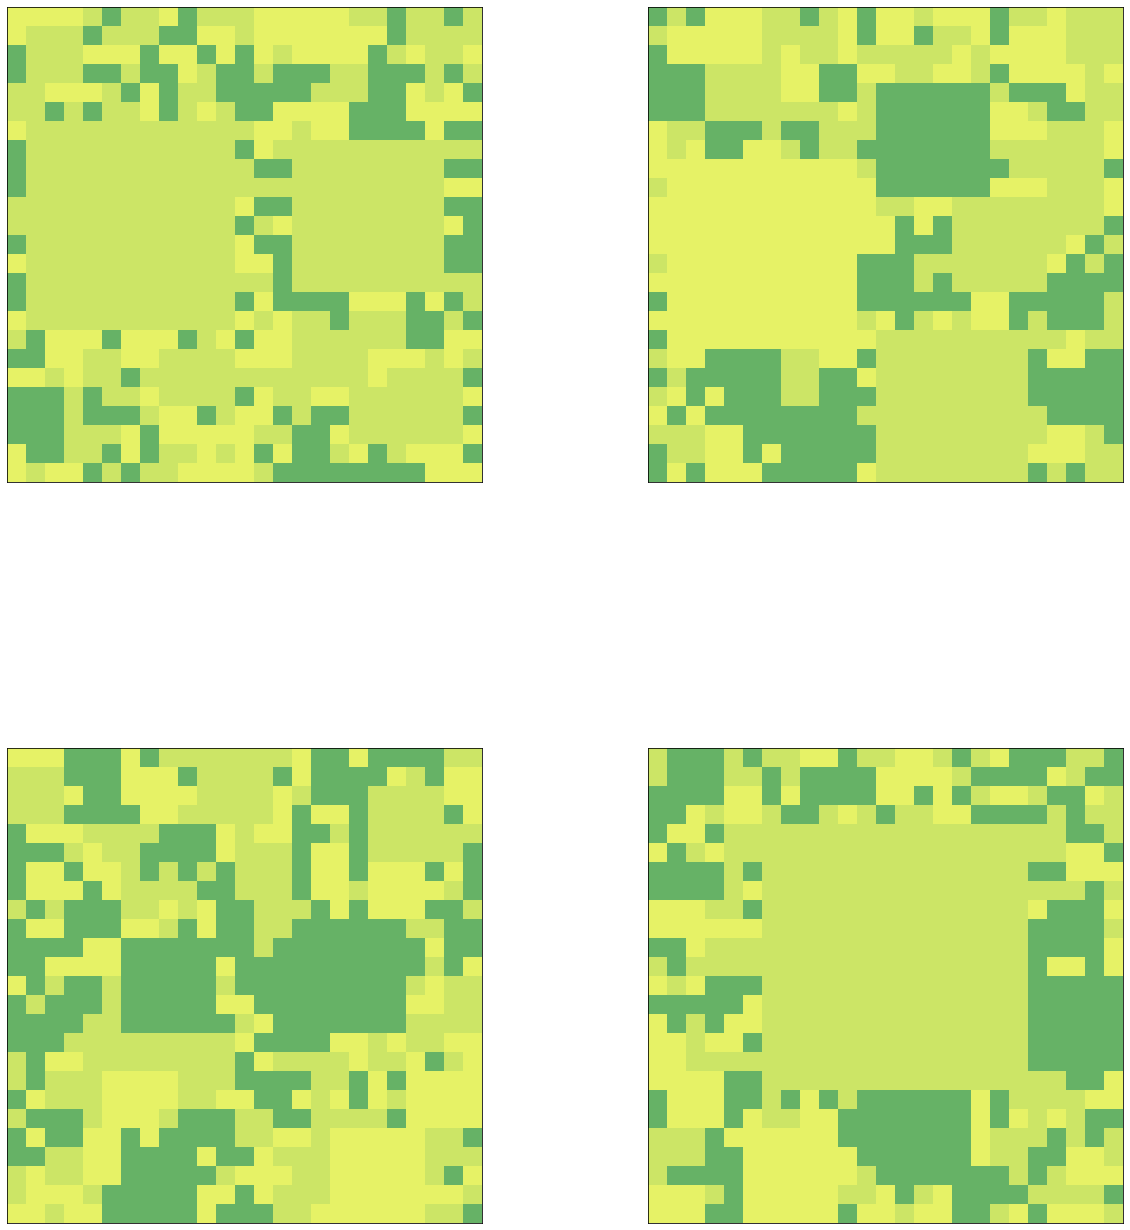

In [12]:
###############################################         MAIN MAIN MAIN MAIN       #################
print(); print('YOU pick the grid size and I will pick the color scheme and create the SQUARE ART'); print(); print()

#establish figure, axes objects
fig, ax = plt.subplots(2, 2, figsize = (20, 25))
plt.subplots_adjust(wspace = 0.35)

colors = []; maps = np.random.choice(['summer', 'terrain', 'jet', 'bone', 'twilight', 'cool', 'hot'])
quantity_color = int(input('HOW MANY COLORS? max 10: '))
for i in range(quantity_color):
    color = -1 * np.random.randint(1, 11)
    colors.append(color)

# establish grid size and color scheme via input
number_rows = int(input('HOW MANY ROWS? '))                          #input number of rows
number_cols = int(input('HOW MANY COLUMNS? ')); print(); print();    #input number of columns

for i in range(2):                                                   #establish (2 stage) loop for subplots
    for j in range(2):                                               
        grid = np.zeros(number_rows * number_cols)                   #establish 1D 'grid' of zeros 'available'
        while 0 in grid:
            block_color = determine_block_color()                    #color of square
            selected_index = select_element()[0]                     #integer index of 1D grid element to start (NW) new block
            block_size = determine_block_size();                     #size of square
            block_merge()                                            #write square info to grid
        ax[i, j].tick_params(bottom = False, left = False, labelbottom = False, labelleft = False)
        ax[i, j].imshow(grid.reshape(number_rows, number_cols), vmin = -11, vmax = -1, cmap = maps)     